In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
from scipy.stats import pareto
import math 
import statistics 
from scipy.integrate import quad
import seaborn as sns


In [2]:
def teta_est(x):
    return n/sum(np.log(x)) + 1
n = 100
teta = 5
x = pareto.rvs(b=teta-1, size=n)
teta_e = teta_est(x)
teta_e

5.10473586353302

# Доверительный интервал

## Для медианы

In [3]:
a1_med = 2**(1/(teta_e-1)) - 1.96*2**(1/(teta_e-1))*np.log(2)/((teta_e-1)*n**0.5)
a2_med = 2**(1/(teta_e-1)) + 1.96*2**(1/(teta_e-1))*np.log(2)/((teta_e-1)*n**0.5)
print((a1_med, a2_med))
print(statistics.median(x))

(1.1447743335554044, 1.2231468066375741)
1.2026188369897066


## Баесовский Д.И

In [4]:
import decimal
decimal.getcontext().prec = 100

In [5]:
def integrand(tet, x_prod, n):
    return ( ((decimal.Decimal(tet - 1))**decimal.Decimal(n))*np.exp(decimal.Decimal(1-tet))
            /decimal.Decimal(decimal.Decimal(x_prod)**decimal.Decimal(tet)) )

In [6]:
x_prod = x.prod()
res = quad(integrand, 1, np.inf, args=(decimal.Decimal(x_prod), decimal.Decimal(n)))

In [7]:
c = 1/res[0]
c 

2.7104151337783086e-06

In [8]:
def integrand_с(tet, x_prod, n, c):
    return ( decimal.Decimal(c)*((decimal.Decimal(tet - 1))**decimal.Decimal(n))*np.exp(decimal.Decimal(1-tet))
            /decimal.Decimal(decimal.Decimal(x_prod)**decimal.Decimal(tet)) )

In [9]:
a1_bay = 0
a2_bay = teta*10

for y in np.linspace(2, 6, num = 1000):
    res_low = quad(integrand_с, 1, y, args=(decimal.Decimal(x_prod), decimal.Decimal(n), decimal.Decimal(c)))
    res_high = quad(integrand_с, y, np.inf, args=(decimal.Decimal(x_prod), decimal.Decimal(n), decimal.Decimal(c)))
    if abs(res_high[0] - 0.025) < 0.001 and y < a2_bay :
        a2_bay = y
    if abs(res_low[0] - 0.025) < 0.001:
        a1_bay = y
a1_bay, a2_bay

(4.246246246246246, 5.791791791791791)

## Асимптотический Д.И.

In [10]:
a1_as = teta_e - 1.96*(teta_e - 1)/(n**0.5)
a2_as = teta_e + 1.96*(teta_e - 1)/(n**0.5)
(a1_as, a2_as)

(4.300207634280548, 5.909264092785492)

## Bootstrap

In [11]:
delta = np.array([])
teta_b = np.array([])

for i in range(0,1000):
    bootstrap = np.random.choice(x, size = x.shape[0]).round(2) 
    delta = np.append(delta, teta_est(bootstrap) - teta_e)
    teta_b = np.append(teta_b, teta_est(bootstrap))
    

delta.sort() 
a1_boot, a2_boot = teta_e - delta[974], teta_e - delta[24]
(a1_boot, a2_boot)

(4.0542811112188035, 5.951720704945444)

## Параметрический Bootstrap
 

In [13]:
d_par = np.array([])

for i in range(50000):
    boot_par = pareto.rvs(b = teta-1, size=n)
    d_par = np.append(d_par, teta_est(boot_par) - teta_e)

d_par.sort() 
(a1_boot_par, a2_boot_par) = ( teta_e - d_par[int(d_par.shape[0]*0.974)],
                               teta_e - d_par[int(d_par.shape[0]*0.024)] )
(a1_boot_par, a2_boot_par)

(4.299596480557341, 5.903556677766785)

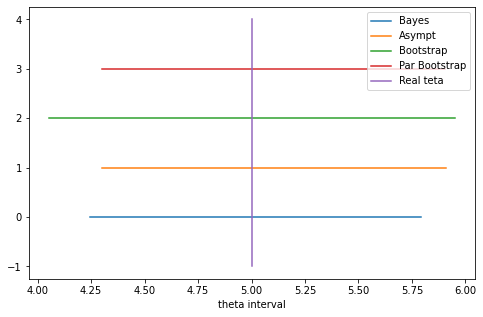

In [14]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot([a1_bay, a2_bay], [0, 0], label = 'Bayes')
ax.plot([a1_as, a2_as], [1, 1], label = 'Asympt')
ax.plot([a1_boot, a2_boot], [2, 2], label = 'Bootstrap')
ax.plot([a1_boot_par, a2_boot_par], [3, 3], label = 'Par Bootstrap')

ax.plot([teta, teta], [-1, 4], label = 'Real teta')

ax.set_xlabel('theta interval')
ax.legend(loc = 'best')